In [85]:
#author: Armin Alibasic

#all libraries
import tweepy #https://github.com/tweepy/tweepy library for downloading tweets
#alternative is use of website https://www.octoparse.com/

import pandas as pd  #saving tweets in csv format
import oauth_info # our local file with the OAuth infos
%run oauth_info.py #auth details
import matplotlib.pyplot as plt #for graphs
import matplotlib.cm as cm #for graphs

from wordcloud import WordCloud, STOPWORDS #world cloud
import sys #file path
#from tweepy import Stream #download tweets
#from tweepy.streaming import StreamListener #download tweets

#login podaci za twitter api 
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)  


# If the authentication was successful, this should print the
# screen name / username of the account
print(api.verify_credentials().screen_name)

UnboxingSve


In [3]:
# Function to extract tweets
def get_tweets(username):
 
        # 50 tweets to be extracted
        number_of_tweets=10
        tweets = api.user_timeline(screen_name=username)
 
        # Empty Array
        tmp=[] 
 
        # create array of tweet information: username, 
        # tweet id, date/time, text
        tweets_for_csv = [tweet.text for tweet in tweets] # CSV file created 
        for j in tweets_for_csv:
 
            # Appending tweets to the empty array tmp
            tmp.append(j) 
 
        # Printing the tweets
        print(tmp)
        
# Driver code
if __name__ == '__main__':
 
    # Here goes the twitter handle for the user
    # whose tweets are to be extracted.
    get_tweets("RTErdogan") 

Forbidden: 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product

In [91]:
#import pandas as pd --we already did this import at the beggining

# Load the CSV file
# Load the CSV file with 'ISO-8859-9' encoding for Turkish language
df = pd.read_csv('TurkiyeKeywordTwitterV2.csv', encoding='ISO-8859-9')
df['Datetime'] = pd.to_datetime(df['UTC_Time'])

In [95]:
df.head(10)
#df.info()
#df.shape
#df.nunique()


Category                       1
Keyword                        1
Tweet_Website               1293
Author_Name                  549
Author_Web_Page_URL          551
UTC_Time                    1286
Tweet_Content               1286
Tweet_Content_Translated    1286
Tweet_Image_URL              960
Ads                            1
Tweet_Number_of_Reviews      186
Tweet_Number_of_Retweets     279
Tweet_Number_of_Likes        416
Tweet_Number_of_Looks       1208
Datetime                    1286
dtype: int64

In [14]:
#This takes very long time depending from the size of data
from googletrans import Translator
#if you get error No module named 'googletrans'
#then install googletrans library by using pip install googletrans

# Initialize the translator
translator = Translator()

# Function to translate the content
def translate_to_english(text):
    try:
        translation = translator.translate(text, dest='en')
        return translation.text
    except Exception as e:
        return f"Error: {str(e)}"

# Apply the translation function to the "Tweet_Content" column
df['Tweet_Content_Translated'] = df['Tweet_Content'].apply(translate_to_english)

# Save the new dataframe with translations to a CSV file
df.to_csv('translated_tweets2.csv', index=False)

print("Translation complete. Saved as 'translated_tweets.csv'.")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\armin\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\armin\AppData\Local\Temp\ipykernel_28068\1365545127.py", line 9, in <module>
    df['Tweet_Content_Translated'] = df['Tweet_Content'].apply(lambda x: translator.translate(x, dest='en').text)
                                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\armin\anaconda3\Lib\site-packages\pandas\core\series.py", line 4630, in apply
    return SeriesApply(self, func, convert_dtype, args, kwargs).apply()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\armin\anaconda3\Lib\site-packages\pandas\core\apply.py", line 1025, in apply
    return self.apply_standard()
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\armin\anaconda3\Lib\site-packages\pandas\core\apply.py", line 10

In [96]:
import numpy as np

def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [97]:
most_frequent_values(df)

,Category,Keyword,Tweet_Website,Author_Name,Author_Web_Page_URL,UTC_Time,Tweet_Content,Tweet_Content_Translated,Tweet_Image_URL,Ads,Tweet_Number_of_Reviews,Tweet_Number_of_Retweets,Tweet_Number_of_Likes,Tweet_Number_of_Looks,Datetime
Total,1317,1317,1317,1317,1317,1317,1317,1317,983,1317,1317,1317,1317,1317,1317
Most frequent item,Post&amp;Comment,Turkiye,https://x.com/cumhuriyetgzt/status/17939685941...,Cumhuriyet,https://x.com/cumhuriyetgzt,2024-07-06 20:54:28+00:00,Turkiye'deki ve dunyadaki tum haksizliklara se...,We are in Strasbourg to voice all injustices i...,https://pbs.twimg.com/media/GT14oF5XIAABNYv.jpg,False,0,0,2,83,2024-07-06 20:54:28+00:00
Frequence,1317,1317,2,184,184,2,4,4,2,1317,456,296,83,5,2
Percent from total,100.0,100.0,0.152,13.971,13.971,0.152,0.304,0.304,0.203,100.0,34.624,22.475,6.302,0.38,0.152


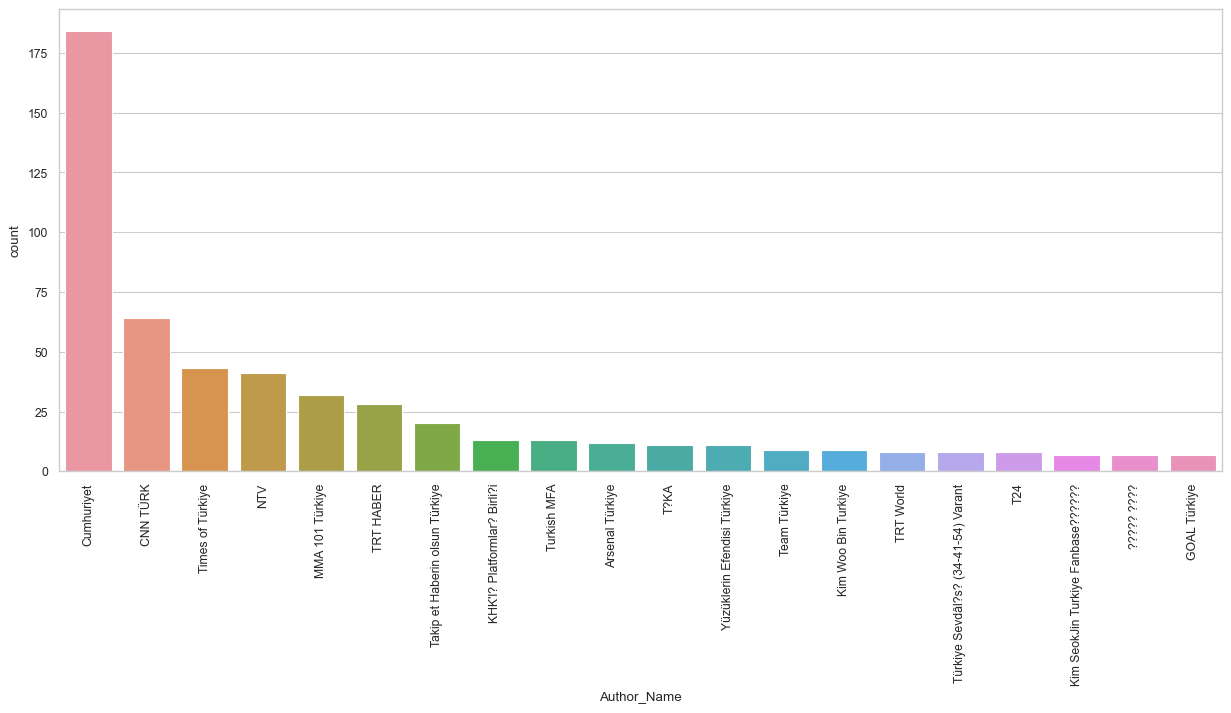

In [98]:
import seaborn as sns

plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Author_Name', order=df["Author_Name"].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

In [99]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [116]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object","de","n",
                     "will","say","let","us","ba","da","en","kad","e","ki","lar","bu","yok","yor","ld","ini","ilk"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 

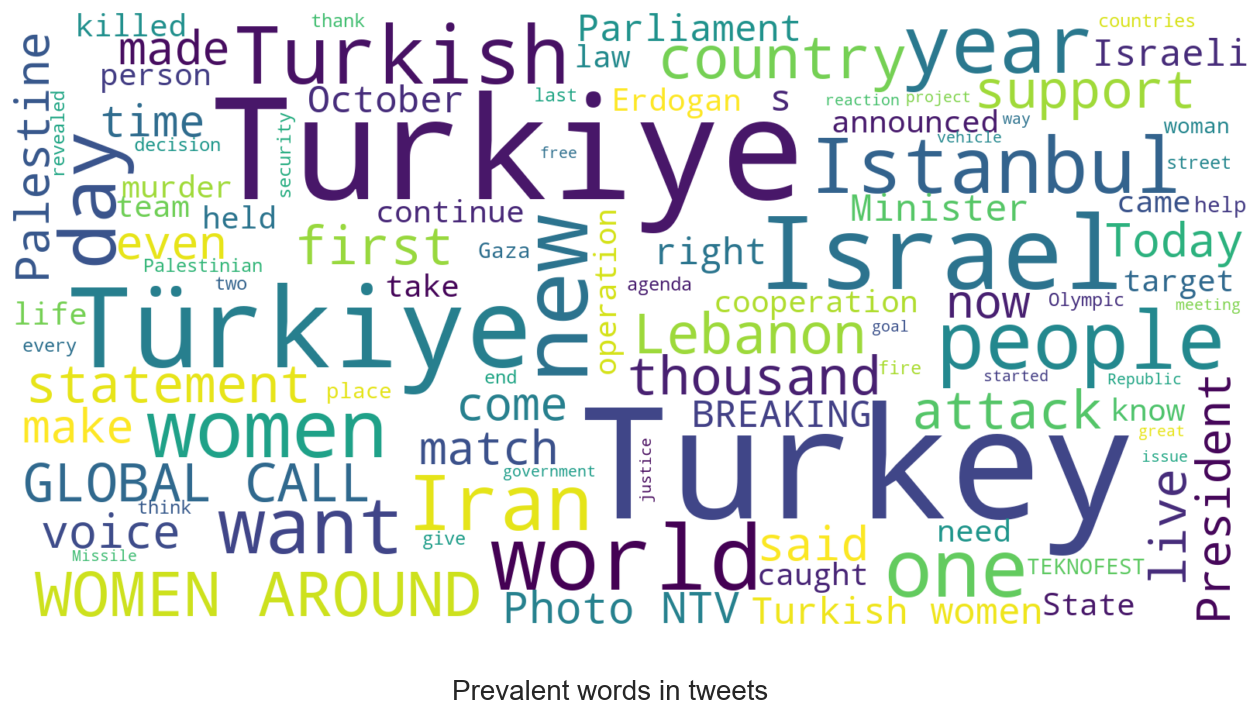

In [117]:
show_wordcloud(df['Tweet_Content_Translated'], title = 'Prevalent words in tweets')

<h1> Timeseries Analysis

In [118]:
df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df['dayofweek'] = df['Datetime'].dt.dayofweek
df['hour'] = df['Datetime'].dt.hour
df['minute'] = df['Datetime'].dt.minute
df['dayofyear'] = df['Datetime'].dt.dayofyear
df['date_only'] = df['Datetime'].dt.date

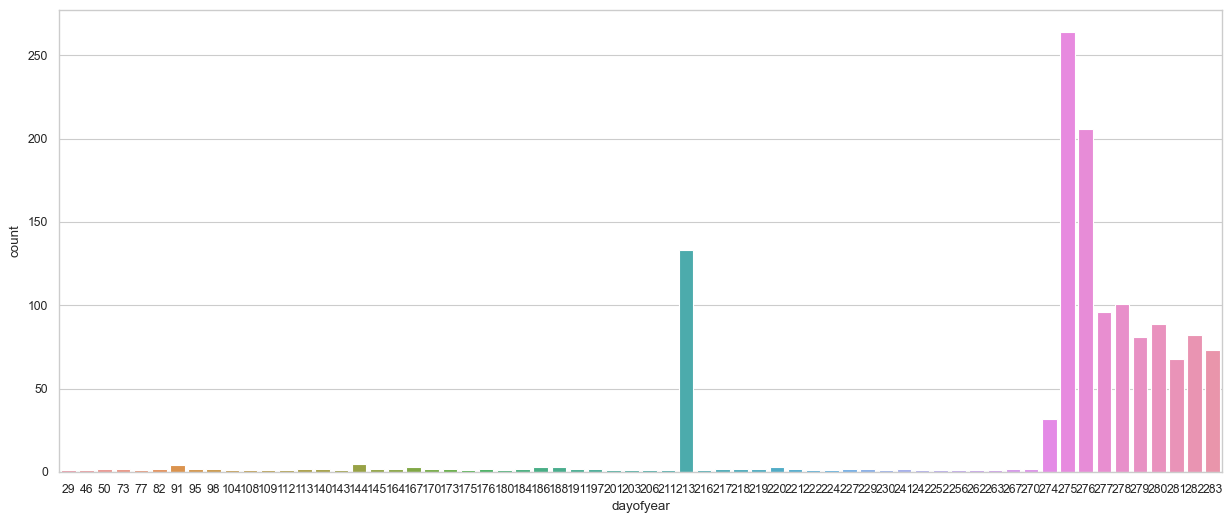

In [119]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='dayofyear')
plt.show()

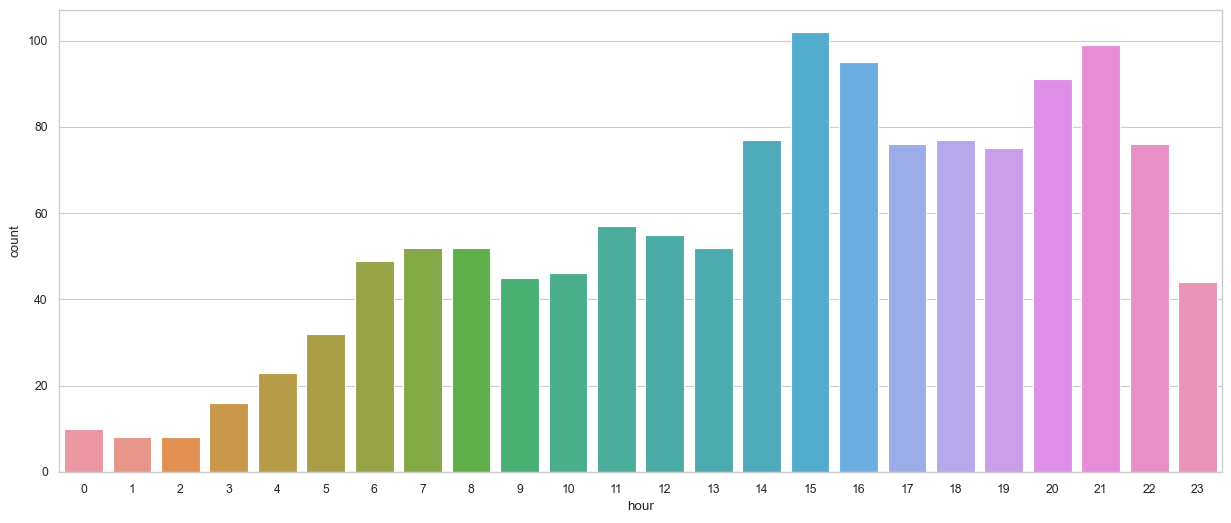

In [106]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='hour')
plt.show()

In [120]:
import nltk #natural language toolkit
#nltk.download('vader_lexicon') #one time activity

sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [122]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    
    colors = ["red", "green", "blue"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

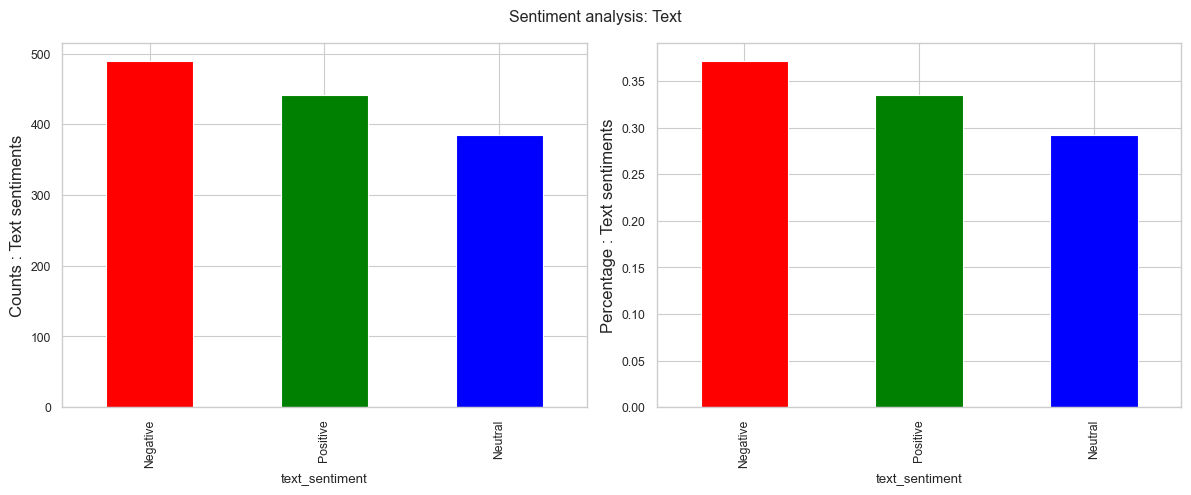

In [123]:
df['text_sentiment'] = df['Tweet_Content_Translated'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'Text')

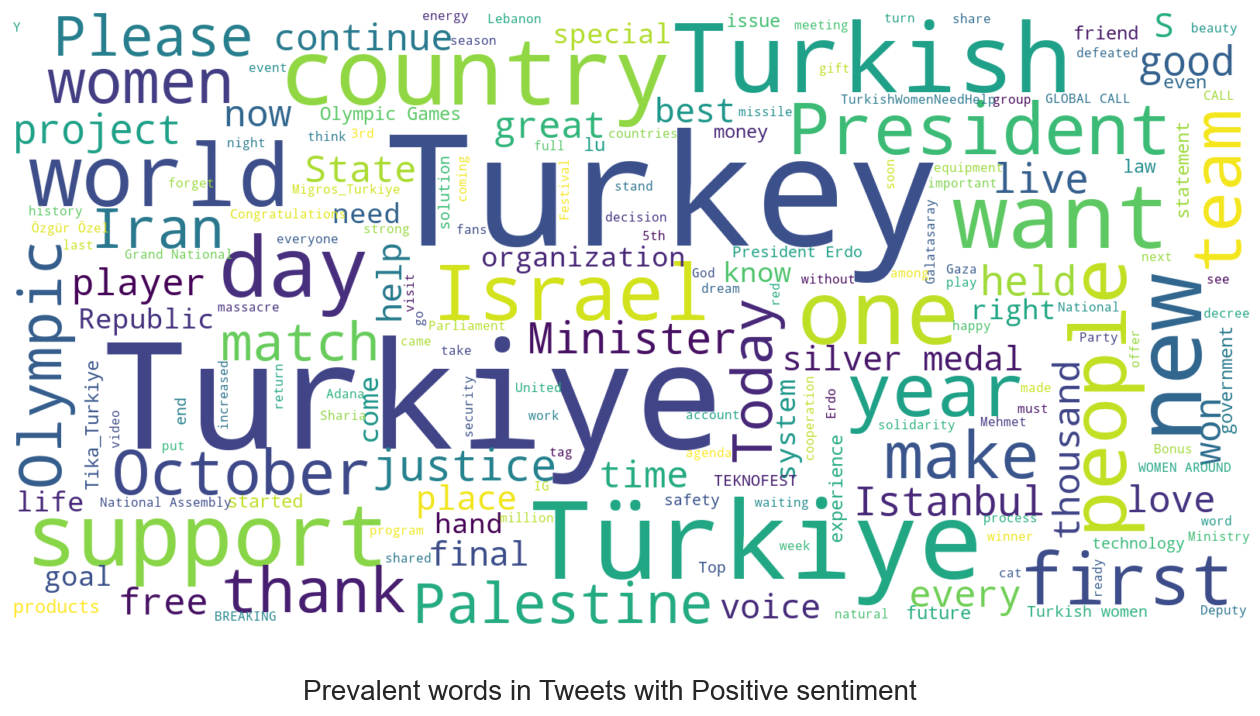

In [124]:
show_wordcloud(df.loc[df['text_sentiment']=="Positive", 'Tweet_Content_Translated'], title = 'Prevalent words in Tweets with Positive sentiment', mask=None)

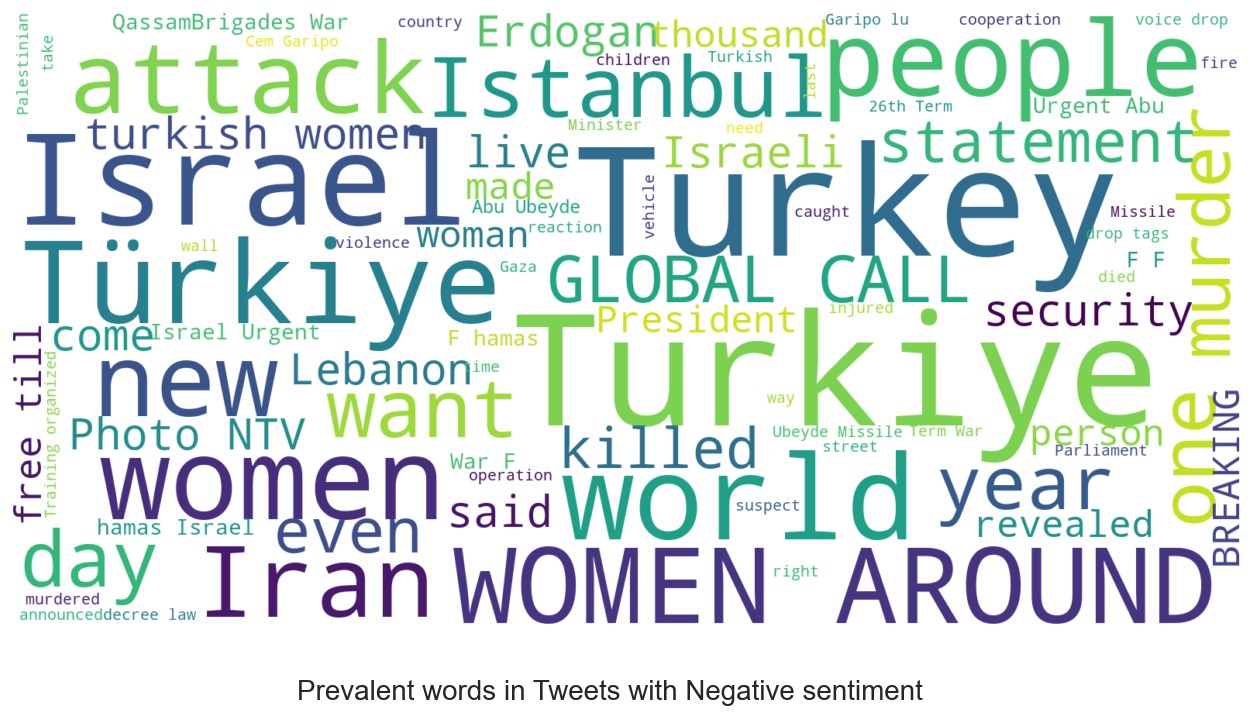

In [125]:
show_wordcloud(df.loc[df['text_sentiment']=="Negative", 'Tweet_Content_Translated'], title = 'Prevalent words in Tweets with Negative sentiment', mask=None)

In [126]:
df_Cumhuriyet = df.loc[df['Author_Name']=="Cumhuriyet"]

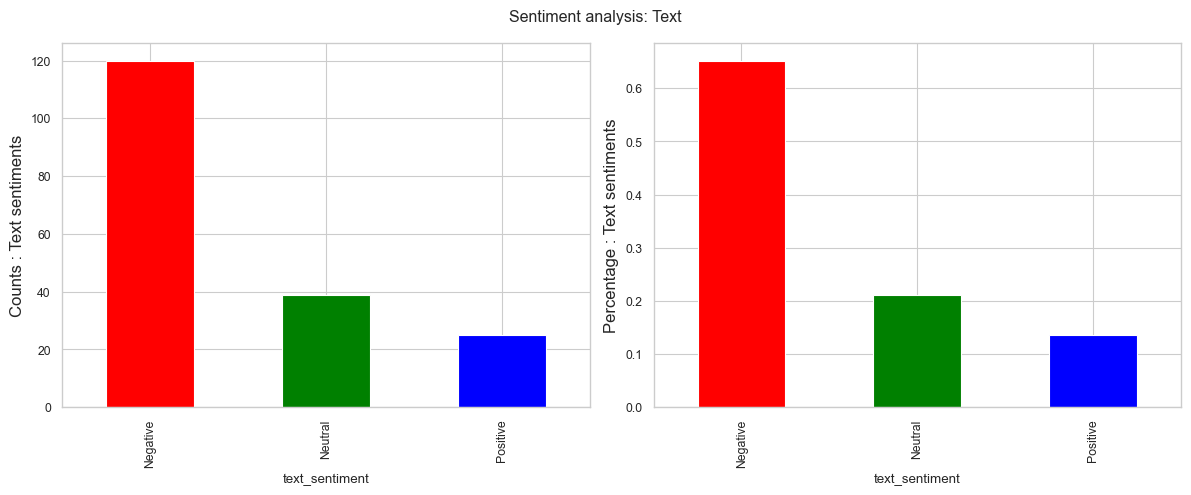

In [127]:
plot_sentiment(df_Cumhuriyet, 'text_sentiment', 'Text')

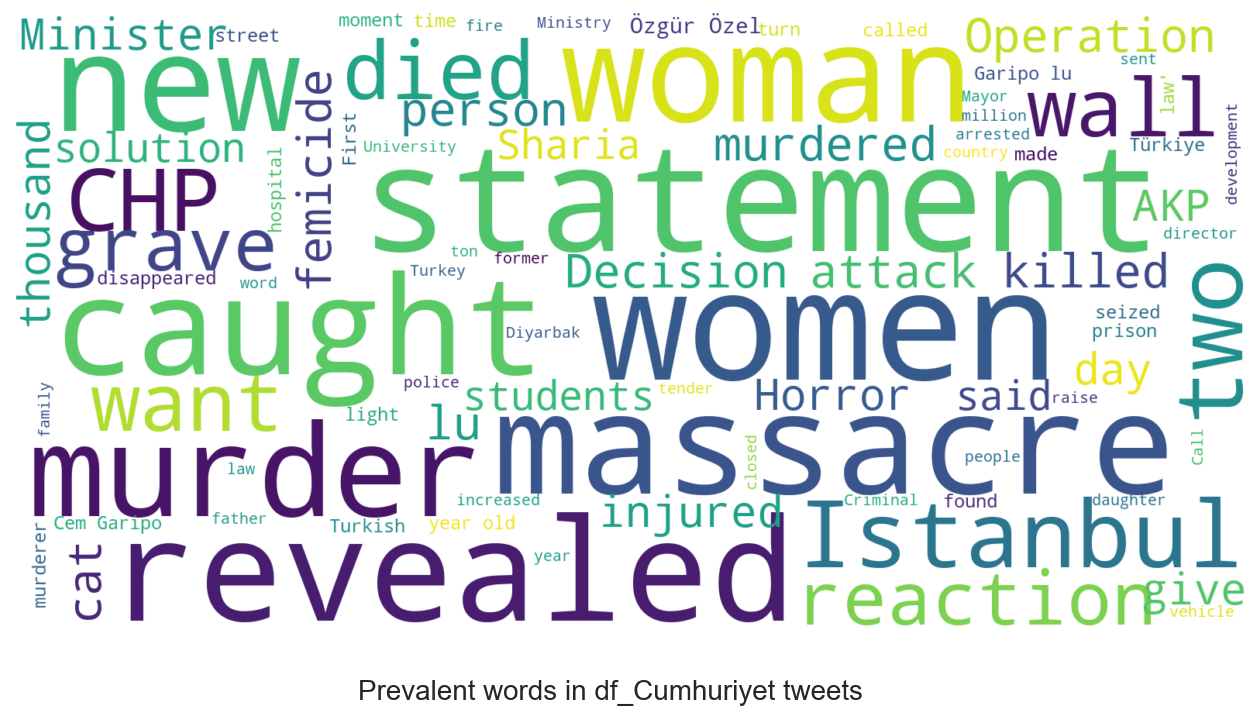

In [128]:
show_wordcloud(df_Cumhuriyet['Tweet_Content_Translated'], title = 'Prevalent words in df_Cumhuriyet tweets')